In [1]:
# Base libraries
import PyQt5
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import os
import math
from itertools import cycle

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

# stats models tools
import statsmodels.api as sm

# Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# for expanding plots
from pylab import rcParams


# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# get the time series module
import timeseries_module as ts
import timeseries_module_v1 as ts1

# import more libraries

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

from statsmodels.tools.eval_measures import mse, rmse


from pylab import rcParams

import datetime as dt


pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
myPath = os.path.join('C:\\', 'Users', 'bbutler', 'Documents\DigitalAnalytics')

os.chdir(myPath)

kwData = pd.read_csv('checkingKeywords.csv',skiprows = 2, index_col='Week', parse_dates=True)



# free checking: (Massachusetts)	open online checking account: (Massachusetts)	checking: (Massachusetts)

kwData.columns = ['free_checking', 'open_online_checking_account', 'checking']

kwData.head()

conversions = pd.read_csv('checkingConversions.csv',index_col='Date', parse_dates=True)

conversions.columns = ['application_starts', 'CPAS']

conversions.head()

conversions.info()

# convert CPAS to numeric
conversions['CPAS'] = conversions['CPAS'].astype(float)

conversions['total_cost'] = conversions['application_starts'] * conversions['CPAS']

conversions.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2020-06-12 to 2020-08-13
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   application_starts  63 non-null     int64  
 1   CPAS                61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


,application_starts,CPAS,total_cost
Date,,,
2020-06-12,6,31.60,189.60
2020-06-13,3,37.16,111.48
2020-06-14,2,52.75,105.50
2020-06-15,6,37.82,226.92
2020-06-16,8,68.20,545.60


In [3]:
# resample conversions to weekly

# weekly sample drops call center state
weekly_conv = conversions.resample('W').aggregate(
                                 {'application_starts': np.sum,
                                  'total_cost': np.sum})


weekly_conv['CPAS'] = weekly_conv['total_cost']/weekly_conv['application_starts']





# reset indices
kwData.reset_index(inplace=True)

weekly_conv.reset_index(inplace=True)

weekly_conv.rename(columns = {'Date':'Week'}, inplace=True)


# merge df

combined = kwData.merge(weekly_conv, on='Week', how='left')
print(combined)



# reset the index to week
combined = combined.set_index(combined['Week'])

combined.info()

          Week  free_checking  open_online_checking_account  checking  \
0   2017-01-01              2                             0        42   
1   2017-01-08              2                             0        64   
2   2017-01-15              4                             2        69   
3   2017-01-22              0                             0        60   
4   2017-01-29              2                             0        72   
..         ...            ...                           ...       ...   
186 2020-07-26              0                             2        55   
187 2020-08-02              2                             2        63   
188 2020-08-09              2                             0        51   
189 2020-08-16              4                             0        59   
190 2020-08-23             10                             0        91   

     application_starts  total_cost   CPAS  
0                   nan         nan    nan  
1                   nan         n

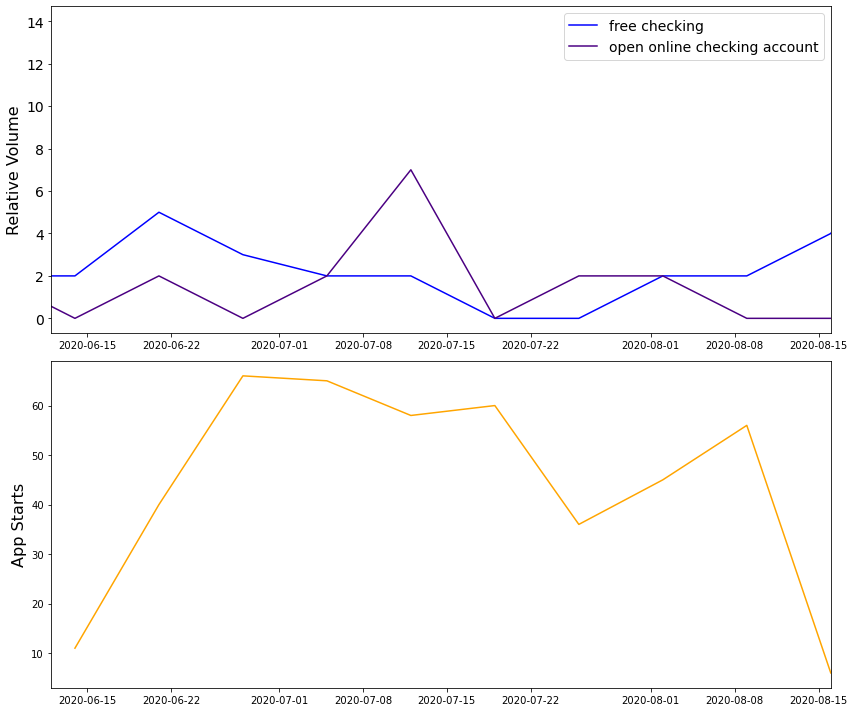

In [4]:
# make the nice plot

# set the figure size
fig = plt.figure(figsize = (12,10))

# the series
ax1 = fig.add_subplot(211)
ax1.plot(combined.index.values, combined['free_checking'], color = 'blue', label = 'free checking')

ax1.plot(combined.index.values, combined['open_online_checking_account'], color = 'indigo', label = 'open online checking account')

# plot the legend for the first plot
ax1.legend(loc = 'upper right', fontsize = 14)

plt.ylabel('Relative Volume', fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=14) 

# Hide the top x axis
ax1.axes.get_xaxis().set_visible(True)
dstart = dt.datetime(2020, 6, 12)
dend = dt.datetime(2020, 8, 16)

ax1.set_xlim([dstart,dend])


# plot 212 is the app starts

# plot series
ax2 = fig.add_subplot(212)
ax2.plot(combined.index.values, combined['application_starts'], color = 'orange', label = 'App Starts')



# set the fontsize for the bottom plot
plt.ylabel('App Starts', fontsize=16)
# plt.setp(ax1.get_yticklabels(), fontsize=14) 
# plt.setp(ax1.get_xticklabels(), fontsize=14)
ax2.set_xlim([dstart,dend])


plt.tight_layout()
plt.show();





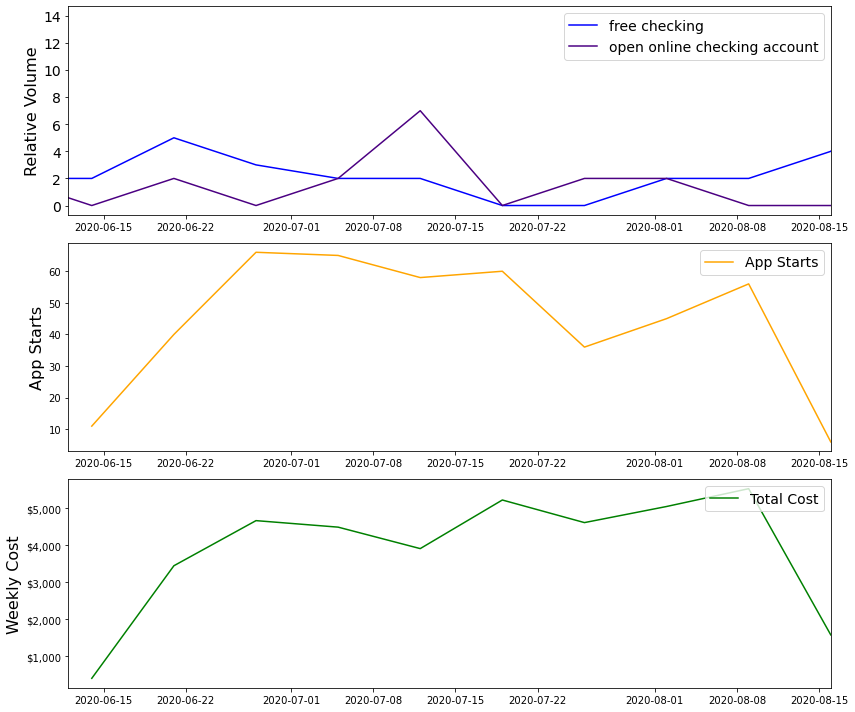

In [6]:
# make the nice plot
import matplotlib as mpl

# set the figure size
fig = plt.figure(figsize = (12,10))

# the series
ax1 = fig.add_subplot(311)
ax1.plot(combined.index.values, combined['free_checking'], color = 'blue', label = 'free checking')
ax1.plot(combined.index.values, combined['open_online_checking_account'], color = 'indigo', label = 'open online checking account')


# plot the legend for the first plot
ax1.legend(loc = 'upper right', fontsize = 14)

plt.ylabel('Relative Volume', fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=14) 

# Hide the top x axis
ax1.axes.get_xaxis().set_visible(True)
dstart = dt.datetime(2020, 6, 12)
dend = dt.datetime(2020, 8, 16)

ax1.set_xlim([dstart,dend])


# plot 212 is the app starts

# plot series
ax2 = fig.add_subplot(312)
ax2.plot(combined.index.values, combined['application_starts'], color = 'orange', label = 'App Starts')

# plot the legend for the second plot
ax2.legend(loc = 'upper right', fontsize = 14)

# set the fontsize for the bottom plot
plt.ylabel('App Starts', fontsize=16)
# plt.setp(ax1.get_yticklabels(), fontsize=14) 
# plt.setp(ax1.get_xticklabels(), fontsize=14)
ax2.set_xlim([dstart,dend])





# plot 313 is the app cost

# plot series
ax3 = fig.add_subplot(313)
ax3.plot(combined.index.values, combined['total_cost'], color = 'green', label = 'Total Cost')

ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

# plot the legend for the second plot
ax3.legend(loc = 'upper right', fontsize = 14)

# set the fontsize for the bottom plot
plt.ylabel('Weekly Cost', fontsize=16)
# plt.setp(ax1.get_yticklabels(), fontsize=14) 
# plt.setp(ax1.get_xticklabels(), fontsize=14)
ax3.set_xlim([dstart,dend])


plt.tight_layout()
plt.show();





